In [63]:
!pip install openpyxl xlsxwriter

     |████████████████████████████████| 149 kB 362 kB/s eta 0:00:01


In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set option for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

### Generate fake lab data

$$
\begin{equation}
    y = a_1 x_1 + a_2 x_2 + a_3 x_3 + c
\end{equation}

$$

In [51]:
def real_function_3d(x1, x2, x3):
    return 0.5*x1 + 2.6*x2 + 7.3*x3

def real_function_1d(x1):
    return 0.5*x1

def generate_data(size):
    x_observe = np.linspace((0, 0, 0), (10, 10, 10), size).T
    y_observe_3d = real_function_3d(x_observe[0], x_observe[1], x_observe[2]) + np.random.normal(0, 0.1, size)
    y_observe_1d = real_function_1d(x_observe[0]) + np.random.normal(0, 0.1, size)
    return x_observe, y_observe_3d, y_observe_1d

In [83]:
writer = pd.ExcelWriter('data/data.xlsx', engine='xlsxwriter')
for i in range(5):
    # Save data to csv, xlse file
    size = 21
    x_observe, y_observe_3d, y_observe_1d = generate_data(size)
    df = pd.DataFrame(data=x_observe.T, columns=['x1', 'x2', 'x3'])
    df['y3d_noise'] = y_observe_3d
    df['y1d_noise'] = y_observe_1d
    # Random from [poompong, areeya, sujin] and add to the data
    df['experimentalist'] = np.random.choice(['poompong', 'areeya', 'sujin'], size=size)
    df.to_csv(f'data/data_{i}.csv', index=False)
    
    df.to_excel(writer, index=True, sheet_name=f'data_{i}')
writer.save()

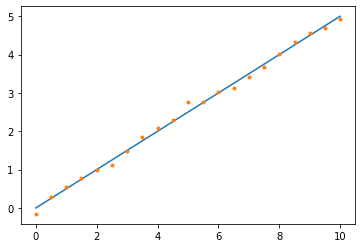

In [53]:
plt.plot(x_observe[0], real_function_1d(x_observe[0]))
plt.plot(x_observe[0], y_observe_1d, '.')

### Import data from .csv, .xlsx to pandas Dataframe

In [84]:
# import data from data/data_{i}.csv from i = 0 to i = 4 and combine them to one dataframe
df_list = []
for i in range(5):
    df_single = pd.read_csv(f'data/data_{i}.csv')
    df_single['round'] = i
    df_list.append(df_single)
df = pd.concat(df_list)
df

,x1,x2,x3,y3d_noise,y1d_noise,experimentalist,round
0,0.0,0.0,0.0,0.053034,-0.136170,poompong,0
1,0.5,0.5,0.5,5.302306,0.264805,areeya,0
2,1.0,1.0,1.0,10.723522,0.429544,poompong,0
3,1.5,1.5,1.5,15.398749,0.832847,areeya,0
4,2.0,2.0,2.0,21.008958,0.895425,sujin,0
...,...,...,...,...,...,...,...
16,8.0,8.0,8.0,83.212754,3.845586,areeya,4
17,8.5,8.5,8.5,88.514339,4.174551,poompong,4
18,9.0,9.0,9.0,93.592365,4.408959,sujin,4
19,9.5,9.5,9.5,98.623309,4.677249,poompong,4


In [94]:
# import data from data/data.xlsx from sheet name = data_{i} and combine them to one dataframe
df_list = []
for i in range(5):
    df_single = pd.read_excel('data/data.xlsx', sheet_name=f'data_{i}')
    df_single['round'] = i
    df_list.append(df_single)
df = pd.concat(df_list)
df

,Unnamed: 0,x1,x2,x3,y3d_noise,y1d_noise,experimentalist,round
0,0,0.0,0.0,0.0,0.053034,-0.136170,poompong,0
1,1,0.5,0.5,0.5,5.302306,0.264805,areeya,0
2,2,1.0,1.0,1.0,10.723522,0.429544,poompong,0
3,3,1.5,1.5,1.5,15.398749,0.832847,areeya,0
4,4,2.0,2.0,2.0,21.008958,0.895425,sujin,0
...,...,...,...,...,...,...,...,...
16,16,8.0,8.0,8.0,83.212754,3.845586,areeya,4
17,17,8.5,8.5,8.5,88.514339,4.174551,poompong,4
18,18,9.0,9.0,9.0,93.592365,4.408959,sujin,4
19,19,9.5,9.5,9.5,98.623309,4.677249,poompong,4


In [113]:
pd.set_option('display.max_rows', 20)
df

,point,x1,x2,x3,y3d_noise,y1d_noise,experimentalist,round
0,0,0.0,0.0,0.0,0.053034,-0.136170,poompong,0
1,1,0.5,0.5,0.5,5.302306,0.264805,areeya,0
2,2,1.0,1.0,1.0,10.723522,0.429544,poompong,0
3,3,1.5,1.5,1.5,15.398749,0.832847,areeya,0
4,4,2.0,2.0,2.0,21.008958,0.895425,sujin,0
...,...,...,...,...,...,...,...,...
100,16,8.0,8.0,8.0,83.212754,3.845586,areeya,4
101,17,8.5,8.5,8.5,88.514339,4.174551,poompong,4
102,18,9.0,9.0,9.0,93.592365,4.408959,sujin,4
103,19,9.5,9.5,9.5,98.623309,4.677249,poompong,4


### Clean data

In [95]:
# Rename column Unnamed:0 to point
df.rename(columns={'Unnamed: 0': 'point'}, inplace=True)

# Reindex the dataframe
df.reset_index(drop=True, inplace=True)

df

,point,x1,x2,x3,y3d_noise,y1d_noise,experimentalist,round
0,0,0.0,0.0,0.0,0.053034,-0.136170,poompong,0
1,1,0.5,0.5,0.5,5.302306,0.264805,areeya,0
2,2,1.0,1.0,1.0,10.723522,0.429544,poompong,0
3,3,1.5,1.5,1.5,15.398749,0.832847,areeya,0
4,4,2.0,2.0,2.0,21.008958,0.895425,sujin,0
...,...,...,...,...,...,...,...,...
100,16,8.0,8.0,8.0,83.212754,3.845586,areeya,4
101,17,8.5,8.5,8.5,88.514339,4.174551,poompong,4
102,18,9.0,9.0,9.0,93.592365,4.408959,sujin,4
103,19,9.5,9.5,9.5,98.623309,4.677249,poompong,4


In [114]:
# Select subset of dataframe with certain column
df_subset = df[['point', 'experimentalist', 'round']]
df_subset

,point,experimentalist,round
0,0,poompong,0
1,1,areeya,0
2,2,poompong,0
3,3,areeya,0
4,4,sujin,0
...,...,...,...
100,16,areeya,4
101,17,poompong,4
102,18,sujin,4
103,19,poompong,4


In [115]:
# Suppose that we want to consider only x1, so we drop x2, x3, and y3d_noise.
df_1d_exp = df.drop(['x2', 'x3', 'y3d_noise'], axis=1)
df_1d_exp

,point,x1,y1d_noise,experimentalist,round
0,0,0.0,-0.136170,poompong,0
1,1,0.5,0.264805,areeya,0
2,2,1.0,0.429544,poompong,0
3,3,1.5,0.832847,areeya,0
4,4,2.0,0.895425,sujin,0
...,...,...,...,...,...
100,16,8.0,3.845586,areeya,4
101,17,8.5,4.174551,poompong,4
102,18,9.0,4.408959,sujin,4
103,19,9.5,4.677249,poompong,4


### Aggregate data to mean, std, numpy function, and custom function

In [116]:
# Aggregate the data by experimentalist and point with mean and std
def custom_function(x):
    return x.mean() + 10

df_1d_exp_agg = df_1d_exp.groupby(['point', 'experimentalist']).agg({'y1d_noise': ['mean', 'std'], 
'x1': [np.mean, custom_function]})
df_1d_exp_agg

y1d_noise              x1                
                           mean       std  mean custom_function
point experimentalist                                          
0     areeya           0.026499       NaN   0.0            10.0
      poompong        -0.090761  0.226482   0.0            10.0
      sujin           -0.107352       NaN   0.0            10.0
1     areeya           0.264805       NaN   0.5            10.5
      poompong         0.252482  0.005461   0.5            10.5
...                         ...       ...   ...             ...
19    poompong         4.751898  0.105569   9.5            19.5
      sujin            4.845553       NaN   9.5            19.5
20    areeya           4.833241       NaN  10.0            20.0
      poompong         4.945516  0.039194  10.0            20.0
      sujin            5.025351  0.128426  10.0            20.0

[57 rows x 4 columns]

### Filter data

In [110]:
# Choose the row with specific point and experimentalist
df_1d_exp[(df_1d_exp['point'] == 0) & (df_1d_exp['experimentalist'] == 'areeya')]

,point,x1,y1d_noise,experimentalist,round
42,0,0.0,0.026499,areeya,2


In [123]:
# Aggregate the data by point with mean and std
df_1d_exp_agg = df_1d_exp.groupby(['point']).agg({'y1d_noise': ['mean', 'std'],
'x1': [np.mean, custom_function]})
df_1d_exp_agg

y1d_noise              x1                
           mean       std  mean custom_function
point                                          
0     -0.070627  0.169253   0.0            10.0
1      0.246113  0.046139   0.5            10.5
2      0.457870  0.099636   1.0            11.0
3      0.774791  0.097465   1.5            11.5
4      1.015025  0.142827   2.0            12.0
...         ...       ...   ...             ...
16     3.936014  0.070087   8.0            18.0
17     4.249657  0.082471   8.5            18.5
18     4.498525  0.105070   9.0            19.0
19     4.781584  0.095729   9.5            19.5
20     4.954995  0.103602  10.0            20.0

[21 rows x 4 columns]

In [124]:
df_1d_exp_agg['y1d_noise']['mean']

point
0    -0.070627
1     0.246113
2     0.457870
3     0.774791
4     1.015025
        ...   
16    3.936014
17    4.249657
18    4.498525
19    4.781584
20    4.954995
Name: mean, Length: 21, dtype: float64

### Curve fitting ?

In [125]:
from scipy.optimize import curve_fit

In [130]:
# Define the function to fit
def func(x, a, b):
    return a*x + b

# curve fitting
x = df_1d_exp_agg['x1']['mean']
y = df_1d_exp_agg['y1d_noise']['mean']
y_std = df_1d_exp_agg['y1d_noise']['std']

# Note
# pcov is the estimated covariance of the estimate of the fit parameters.
result, pcov = curve_fit(func, x, y, sigma=y_std)

In [129]:
result

array([0.49936243, 0.00140331])

In [132]:
# Calculate the error of the fit
y_fit = func(x, result[0], result[1])
y_fit_std = np.sqrt(np.diag(pcov))

# Calculate goodness of fit
chi2 = np.sum((y - y_fit)**2 / y_std**2)
print(chi2)

4.594422681570176


In [221]:
# Aggregate the data by experimentalist and point with mean and std
df_3d_exp = df.groupby(['point']).agg({'x1': ['mean'], 'x2': ['mean'], 'x3': ['mean'],'y3d_noise': ['mean', 'std']})
df_3d_exp

x1    x2    x3   y3d_noise          
       mean  mean  mean        mean       std
point                                        
0       0.0   0.0   0.0   -0.056117  0.073899
1       0.5   0.5   0.5    5.199891  0.087503
2       1.0   1.0   1.0   10.467182  0.166591
3       1.5   1.5   1.5   15.539720  0.160030
4       2.0   2.0   2.0   20.835747  0.108694
...     ...   ...   ...         ...       ...
16      8.0   8.0   8.0   83.227843  0.061679
17      8.5   8.5   8.5   88.417331  0.100857
18      9.0   9.0   9.0   93.559288  0.056348
19      9.5   9.5   9.5   98.715373  0.079223
20     10.0  10.0  10.0  104.037723  0.068567

[21 rows x 5 columns]

In [224]:
# For multi dimensional data, we can use the following method
# Define the function to fit
def func_3d(x, a, b, c, d):
    return a*x[0] + b*x[1] + c*x[2] + d

x = [df_3d_exp['x1']['mean'], df_3d_exp['x2']['mean'], df_3d_exp['x3']['mean']]
y = df_3d_exp['y3d_noise']['mean']
y_std = df_3d_exp['y3d_noise']['std']

result, pcov = curve_fit(func_3d, x, y, sigma=y_std)

y_fit = func_3d(x, result[0], result[1], result[2], result[3])
y_fit_std = np.sqrt(np.diag(pcov))

# Calculate goodness of fit
chi2 = np.sum((y - y_fit)**2 / y_std**2)
print(chi2)

4.69310770209897


/var/folders/h5/5lpm2g1154v69zrfw9nx4hj40000gn/T/ipykernel_61201/3826567485.py:13: RuntimeWarning: invalid value encountered in sqrt
  y_fit_std = np.sqrt(np.diag(pcov))


In [223]:
result

array([8.39904596e+00, 1.00000000e+00, 1.00000000e+00, 4.70500038e-03])

In [138]:
# Fit using data from every experimentalists

# Get experimentalists name
experimentalists = df_1d_exp['experimentalist'].unique()
fitting_resutls = {}

for experimentalist in experimentalists:
    df_1d_exp_agg = df_1d_exp[df_1d_exp['experimentalist'] == experimentalist].groupby(['point']).agg({'y1d_noise': ['mean'], 'x1': [np.mean]})
    x = df_1d_exp_agg['x1']['mean']
    y = df_1d_exp_agg['y1d_noise']['mean']

    # curve fitting
    result, pcov = curve_fit(func, x, y)

    # Calculate the error of the fit
    y_fit = func(x, result[0], result[1])
    y_fit_std = np.sqrt(np.diag(pcov))
    chi2 = np.sum((y - y_fit)**2 / y_std**2)

    fitting_resutls[experimentalist] = {
        'x1': result[0],
        'c': result[1],
        'chi2': chi2,
    }



In [140]:
pd.DataFrame(fitting_resutls).T

,x1,c,chi2
poompong,0.497727,0.012123,8.532214
areeya,0.492007,0.042307,13.687887
sujin,0.514082,-0.093980,11.419240


### Visual using pandas, seaborn, and matplotlib

In [148]:
summary_df = pd.DataFrame()
summary_df['x1'] = df_1d_exp_agg['x1']['mean']
summary_df['y1d_noise_mean'] = df_1d_exp_agg['y1d_noise']['mean']
for experimentalist in experimentalists:
    summary_df[experimentalist] = func(summary_df['x1'], fitting_resutls['areeya']['x1'], fitting_resutls['areeya']['c'])
summary_df

,x1,y1d_noise_mean,poompong,areeya,sujin
point,,,,,
0,0.0,-0.107352,0.042307,0.042307,0.042307
1,0.5,0.230399,0.288310,0.288310,0.288310
3,1.5,0.777780,0.780317,0.780317,0.780317
4,2.0,0.895425,1.026320,1.026320,1.026320
5,2.5,1.060725,1.272324,1.272324,1.272324
7,3.5,1.731413,1.764330,1.764330,1.764330
8,4.0,1.895128,2.010334,2.010334,2.010334
9,4.5,2.145429,2.256337,2.256337,2.256337
10,5.0,2.651915,2.502340,2.502340,2.502340


<AxesSubplot:xlabel='x1'>

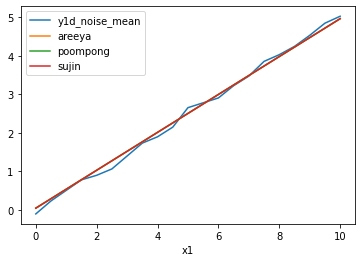

In [151]:
summary_df.plot(
    x='x1',
    y=['y1d_noise_mean', 'areeya', 'poompong', 'sujin'],
)

array([<AxesSubplot:xlabel='x1'>, <AxesSubplot:xlabel='x1'>,
       <AxesSubplot:xlabel='x1'>, <AxesSubplot:xlabel='x1'>], dtype=object)

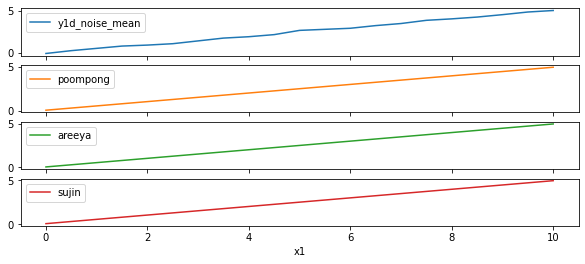

In [158]:
summary_df.plot.line(
    x = 'x1',
    subplots=True,
    figsize=(10, 4),
)

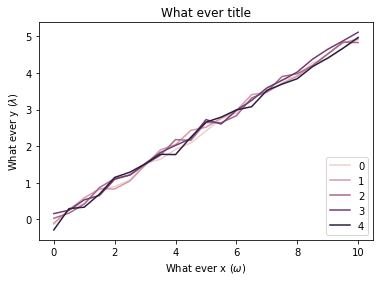

In [167]:
# Using seaborn to plot
s = sns.lineplot(
    data=df,
    x='x1',
    y='y1d_noise',
    hue='round'
)
s.set_ylabel('What ever y ($\lambda$)')
s.set_xlabel('What ever x ($\omega$)')
s.set_title('What ever title')
s.legend(loc='lower right')

# s.figure.savefig('data/plot.png')

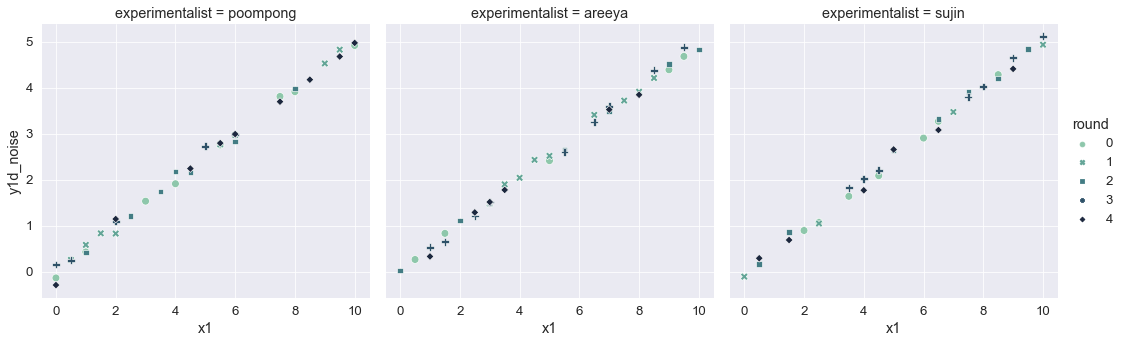

In [181]:
sns.set_theme('paper',
              rc={'figure.figsize': (10, 4)},
              font_scale=1.5
              )

pal = sns.cubehelix_palette(n_colors=5, rot=-.4, light=.7)

sns.relplot(
    data=df,
    x='x1',
    y='y1d_noise',
    style='round', # point style [circle, square, etc]
    hue='round', # color 
    col='experimentalist', 
    kind='scatter', # scatter, line
    s=60, # size of the point for kind = 'scatter', if kind = 'line', use markersize instead of s
    palette=pal, # color palette
)

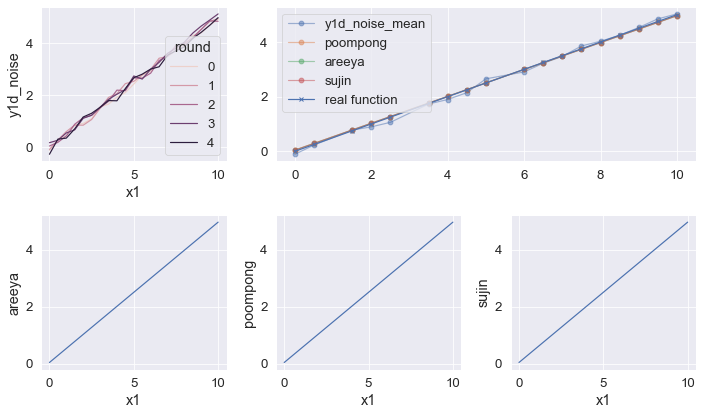

In [225]:
# initial matplotlib subplots
fig, axes = plt.subplot_mosaic([['raw', 'full_result', 'full_result'],
                             ['areeya', 'poompong', 'sujin']], figsize=(10, 6))

s = sns.lineplot(
    data=df,
    x='x1',
    y='y1d_noise',
    hue='round',
    ax=axes['raw']
)

for col in summary_df.drop(['x1'], axis=1).columns:
    axes['full_result'].plot(summary_df['x1'],summary_df[col],'o-',label=col, alpha=0.5)

axes['full_result'].plot(summary_df['x1'], real_function_1d(summary_df['x1']), 'bx-', label='real function')
axes['full_result'].legend()

# Plot the fitted line for each experimentalist
for experimentalist in experimentalists:
    s = sns.lineplot(
        data=summary_df,
        x='x1',
        y=summary_df[experimentalist],
        ax=axes[experimentalist]
    )

fig.tight_layout()



### Export data to .xlsx and latex

In [217]:
print(summary_df.style.to_latex())

\begin{tabular}{lrrrrr}
 & x1 & y1d_noise_mean & poompong & areeya & sujin \\
point &  &  &  &  &  \\
0 & 0.000000 & -0.107352 & 0.042307 & 0.042307 & 0.042307 \\
1 & 0.500000 & 0.230399 & 0.288310 & 0.288310 & 0.288310 \\
3 & 1.500000 & 0.777780 & 0.780317 & 0.780317 & 0.780317 \\
4 & 2.000000 & 0.895425 & 1.026320 & 1.026320 & 1.026320 \\
5 & 2.500000 & 1.060725 & 1.272324 & 1.272324 & 1.272324 \\
7 & 3.500000 & 1.731413 & 1.764330 & 1.764330 & 1.764330 \\
8 & 4.000000 & 1.895128 & 2.010334 & 2.010334 & 2.010334 \\
9 & 4.500000 & 2.145429 & 2.256337 & 2.256337 & 2.256337 \\
10 & 5.000000 & 2.651915 & 2.502340 & 2.502340 & 2.502340 \\
12 & 6.000000 & 2.903993 & 2.994347 & 2.994347 & 2.994347 \\
13 & 6.500000 & 3.222376 & 3.240351 & 3.240351 & 3.240351 \\
14 & 7.000000 & 3.471993 & 3.486354 & 3.486354 & 3.486354 \\
15 & 7.500000 & 3.853689 & 3.732357 & 3.732357 & 3.732357 \\
16 & 8.000000 & 4.027587 & 3.978361 & 3.978361 & 3.978361 \\
17 & 8.500000 & 4.242403 & 4.224364 & 4.224364 & 4.